Gráfico guardado como knn_methods_comparison.png


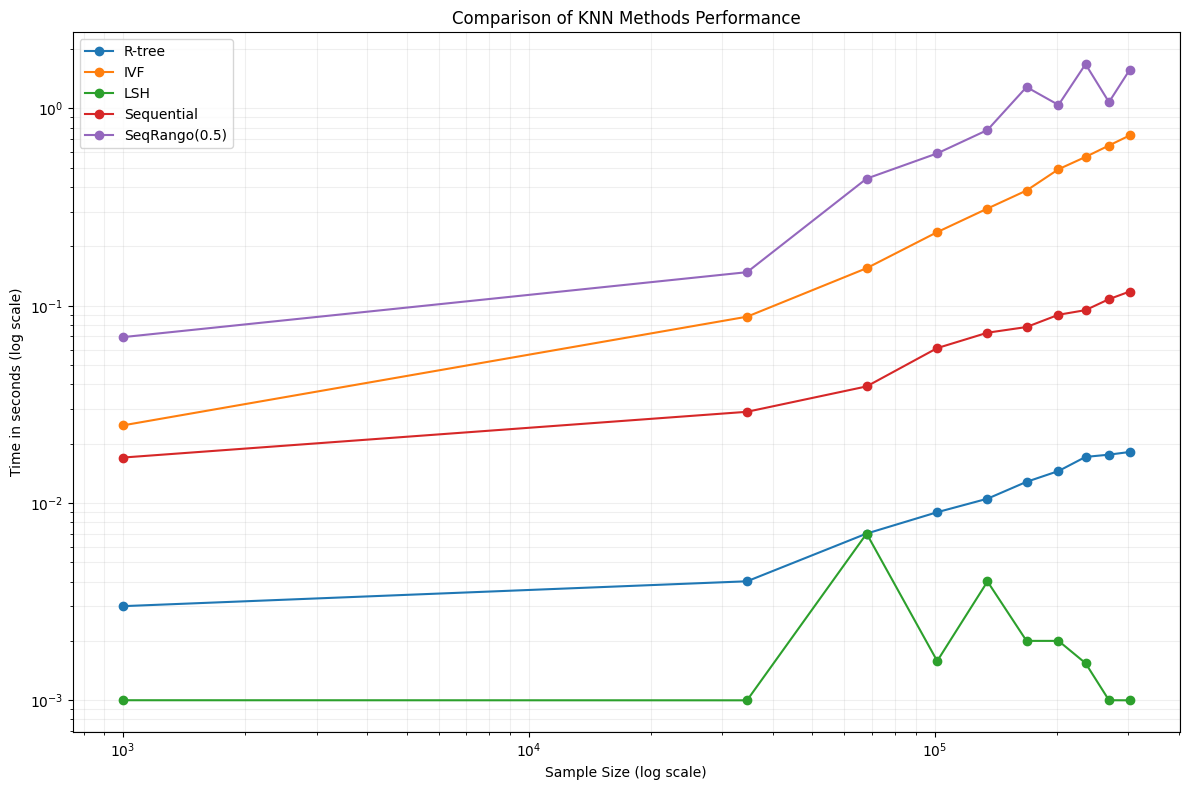

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
def load_times(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"El no eixste: {file_path}")
    df = pd.read_csv(file_path)
    return df.iloc[:, 0].values, df.iloc[:, 1].values

def plot_comparison():
    plt.figure(figsize=(12, 8))
    methods = {
        'time_knn_rtree.csv': 'R-tree',
        'times_knn_ivf.csv': 'IVF',
        'times_knn_lsh.csv': 'LSH',
        'times_knn_seq.csv': 'Sequential',
        'times_knn_seq_ran.csv': 'SeqRango(0.5)'
    }

    times_path = './'
    for filename, label in methods.items():
        file_path = os.path.join(times_path, filename)
        try:
            sizes, times = load_times(file_path)
            plt.loglog(sizes, times, marker='o', label=label)
        except FileNotFoundError as e:
            print(e)
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Time in seconds (log scale)')
    plt.title('Comparison of KNN Methods Performance')
    plt.legend()
    plt.tight_layout()

    output_file = 'knn_methods_comparison.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Gráfico guardado como {output_file}")
    plt.show()

plot_comparison()
